## Inferencing

In this notebook, I show how to perform inference using our wire detection fine-tuned model.

This notebook was run on Google Colab.

In [1]:
!nvidia-smi

Sat May 17 03:29:12 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.5/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

Loading the datset, because i am going to use images from test set. (skip this cell if you are using your custom images)

In [6]:
!pip install roboflow
from google.colab import userdata

from roboflow import Roboflow
rf = Roboflow(api_key=userdata.get('RF_KEY'))
project = rf.workspace("awais-ilfqh").project("wire-detection-x20l6")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Wire-Detection-1 in yolov8:: 100%|██████████| 790/790 [00:00<00:00, 6666.30it/s]




1.   make sure you have placed the model at correct location as you access it.
2.   here i am using the test set images, you can use any.



In [10]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/best.pt conf=0.25 source="/content/Wire-Detection-1/test/images/image_125_jpeg.rf.a742a02be6f45278f5f4fca4927599fb.jpg" save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/Wire-Detection-1/test/images/image_125_jpeg.rf.a742a02be6f45278f5f4fca4927599fb.jpg: 640x640 2 wires, 36.9ms
Speed: 2.7ms preprocess, 36.9ms inference, 184.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


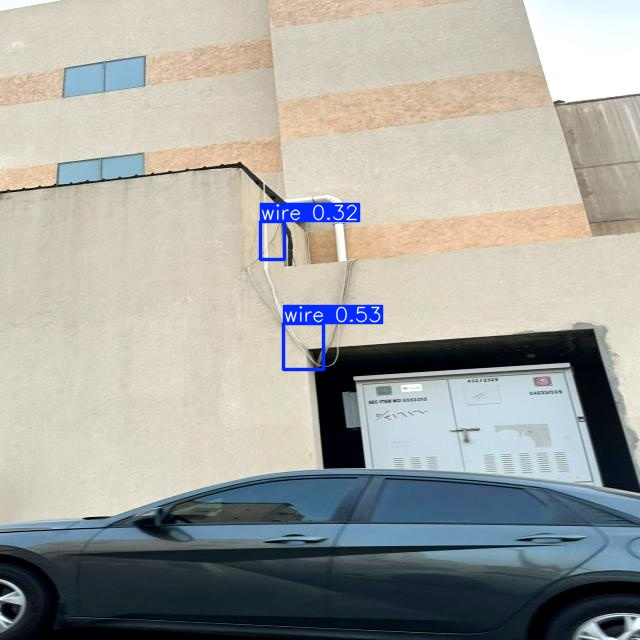

In [11]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict2')] ## predict2 (whatever mentioned in previous output)

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:1]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")